## Importing all the libraries needed for our EDA (Exploratory Data Analysis)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import spearmanr



## We read the salary file and create the DataFrame.

In [2]:
df = pd.read_csv("ds_salaries.csv")
df = pd.DataFrame(df)


In [3]:
# Making a copy
df1 = df.copy()


## We view and analyze the information contained in each column. First, we perform a .info(), and then we examine the values in the columns.

In [4]:
# Information about each column.
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


In [5]:
# We create a function that allows us to know the categories of each of the columns and their values.

def column_info(df):
    """
    This function generates a summary of each column in the DataFrame df, showing the different
    values and their frequency.

    Parameters: df
    """
    for column in df.columns:
        print(f"Summary of the '{column}' column:")
        print(df[column].value_counts())
        print("============================================")


In [6]:
# We apply the newly created function.
column_info(df)

Summary of the 'work_year' column:
work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64
Summary of the 'experience_level' column:
experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64
Summary of the 'employment_type' column:
employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64
Summary of the 'job_title' column:
job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64
Summary of the 'salary' column:
salary
100000    112
1

## Limpieza DF

In [7]:
# We remove the 'Salary' and 'Salary_currency' columns since we will perform the analysis based on the salary in dollars.
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)


In [8]:
# Check for missing values.
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [16]:
# To rename the countries with their full names, we read and make the changes with the "countries" file.

# DataFrame of countries from the CSV file
df_country_names = pd.read_csv("countries.csv")

# Columns of interest
df_country_names1 = df_country_names[[' name', ' iso2', 'continente']]


In [18]:
# Merge to add the 'employee_residence_c' column
df = df.merge(df_country_names1, left_on='employee_residence', right_on=' iso2', how='left')

In [19]:
# Rename columns and remove the ones we don't need
df.rename(columns={' name': 'employee_residence_c', 'continente': 'employee_continent'}, inplace=True)
df.drop(columns=['employee_residence', ' iso2'], inplace=True)


In [21]:
# Perform the same process with company_location
df = df.merge(df_country_names1, left_on='company_location', right_on=' iso2', how='left')

In [29]:
# Rename columns and remove the ones we don't need for company_location
df.rename(columns={' name': 'company_location_c', 'continent': 'company_location_continent'}, inplace=True)
df.drop(columns=['company_location', ' iso2'], inplace=True)



In [13]:
# Convert the "work_year" column to date format
df["work_year"] = pd.to_datetime(df["work_year"], format="%Y").dt.year


In [23]:
# First, we create a dictionary with keys as 2 characters and values as full names
# Then we use the replace method

replacements1 = {
    'SE': 'Senior',
    'MI': 'Mid-level',
    'EN': 'Entry-level',
    'EX': 'Executive'
}

replacements2 = {
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
}

replacements3 = {
    0: "in company",
    50: "hybrid",
    100: "remote"
}

df['experience_level'] = df['experience_level'].replace(replacements1)
df['employment_type'] = df['employment_type'].replace(replacements2)
df['remote_ratio'] = df['remote_ratio'].replace(replacements3)


In [30]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,employee_residence_c,employee_continent,company_location_c,continente
0,2023,Senior,Full-time,Principal Data Scientist,85847,remote,L,Spain,Europa,Spain,Europa
1,2023,Mid-level,Contract,ML Engineer,30000,remote,S,United States of America,América,United States of America,América
2,2023,Mid-level,Contract,ML Engineer,25500,remote,S,United States of America,América,United States of America,América
3,2023,Senior,Full-time,Data Scientist,175000,remote,M,Canada,América,Canada,América
4,2023,Senior,Full-time,Data Scientist,120000,remote,M,Canada,América,Canada,América
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,remote,L,United States of America,América,United States of America,América
3751,2021,Mid-level,Full-time,Principal Data Scientist,151000,remote,L,United States of America,América,United States of America,América
3752,2020,Entry-level,Full-time,Data Scientist,105000,remote,S,United States of America,América,United States of America,América
3753,2020,Entry-level,Contract,Business Data Analyst,100000,remote,L,United States of America,América,United States of America,América


In [31]:
# Lambda function to check if the employee resides in the same country where they work
df["reside_en_mismo_pais"] = df.apply(lambda row: "Yes" if row["employee_residence_c"] == row["company_location_c"] else "No", axis=1)


In [32]:

print(df.info())

print(df.shape)

print(df.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   work_year             3755 non-null   int64 
 1   experience_level      3755 non-null   object
 2   employment_type       3755 non-null   object
 3   job_title             3755 non-null   object
 4   salary_in_usd         3755 non-null   int64 
 5   remote_ratio          3755 non-null   object
 6   company_size          3755 non-null   object
 7   employee_residence_c  3755 non-null   object
 8   employee_continent    3755 non-null   object
 9   company_location_c    3755 non-null   object
 10  continente            3755 non-null   object
 11  reside_en_mismo_pais  3755 non-null   object
dtypes: int64(2), object(10)
memory usage: 352.2+ KB
None
(3755, 12)
      work_year experience_level employment_type                  job_title  \
2833       2022        Executive       Full-t

We have conducted a preliminary cleaning and processing of the DataFrame, removing unnecessary columns, transforming and replacing values, renaming countries with their full names, and generating variables of interest such as whether the employee resides in the same country where they work. Additionally, we reviewed the general information of the DataFrame, its structure, and some sample records.


## Outliers Analysis

<Axes: xlabel='salary_in_usd'>

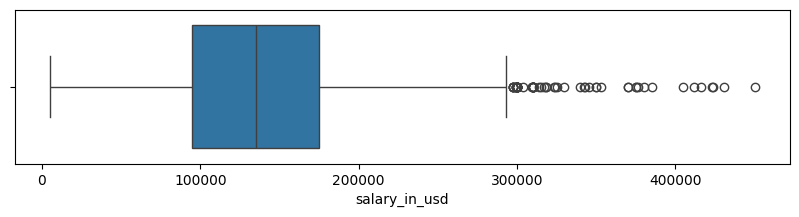

In [33]:
# First, we create a boxplot to visualize the outliers

plt.figure(figsize=(10, 2))

sns.boxplot(x=df['salary_in_usd'])


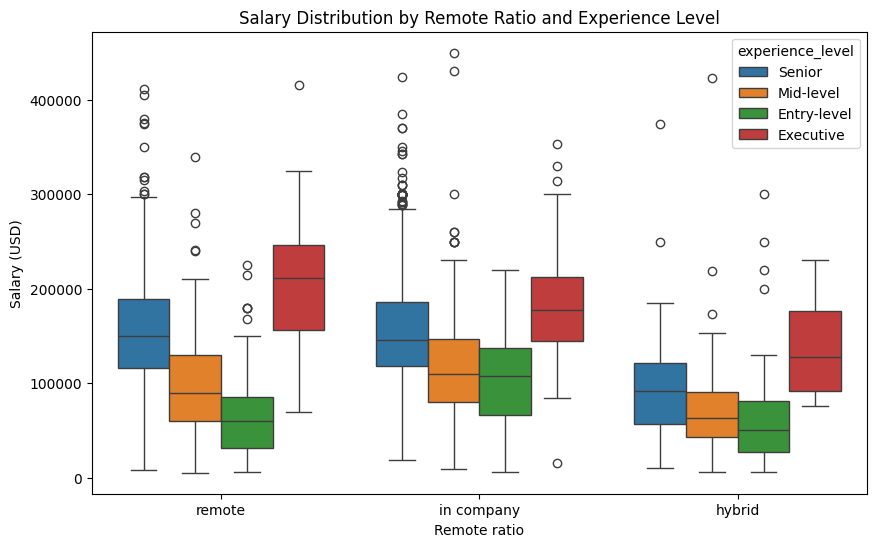

In [34]:
# Create a boxplot to visualize the outliers in the main variables of the DataFrame

plt.figure(figsize=(10, 6))
sns.boxplot(x="remote_ratio", y="salary_in_usd", hue="experience_level", data=df)
plt.xlabel("Remote ratio")
plt.ylabel("Salary (USD)")
plt.title("Salary Distribution by Remote Ratio and Experience Level")
plt.show()


In [35]:
# Calculate the outliers and their representation

Q1 = df["salary_in_usd"].quantile(0.25)
Q3 = df["salary_in_usd"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["salary_in_usd"] < lower_bound) | (df["salary_in_usd"] > upper_bound)]
outliers_percentage = (len(outliers) / len(df)) * 100

print(f"Total outliers: {len(outliers)}")
print(f"Percentage of outliers: {outliers_percentage:.2f}%")


Total outliers: 63
Percentage of outliers: 1.68%


In [37]:
# Show the rows in the original DataFrame that are outliers
df_outliers = df[(df["salary_in_usd"] < lower_bound) | (df["salary_in_usd"] > upper_bound)]

# Sort the rows by salary in descending order
df_outliers_sorted = df_outliers.sort_values(by='salary_in_usd', ascending=False)

# Display the sorted DataFrame
df_outliers_sorted


,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,employee_residence_c,employee_continent,company_location_c,continente,reside_en_mismo_pais
3522,2020,Mid-level,Full-time,Research Scientist,450000,in company,M,United States of America,América,United States of America,América,Yes
2011,2022,Mid-level,Full-time,Data Analyst,430967,in company,M,United Kingdom,Europa,United Kingdom,Europa,Yes
528,2023,Senior,Full-time,AI Scientist,423834,in company,L,Israel,Asia,Israel,Asia,Yes
3747,2021,Mid-level,Full-time,Applied Machine Learning Scientist,423000,hybrid,L,United States of America,América,United States of America,América,Yes
3675,2021,Executive,Contract,Principal Data Scientist,416000,remote,S,United States of America,América,United States of America,América,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
2832,2022,Executive,Full-time,Data Engineer,297500,remote,M,United States of America,América,United States of America,América,Yes
482,2023,Senior,Full-time,Data Scientist,297300,remote,M,United States of America,América,United States of America,América,Yes
1675,2023,Senior,Full-time,Data Science Manager,297300,remote,M,United States of America,América,United States of America,América,Yes
716,2023,Senior,Full-time,Data Scientist,297300,remote,M,United States of America,América,United States of America,América,Yes


In [38]:
column_info(df_outliers)

Summary of the 'work_year' column:
work_year
2023    38
2022    20
2020     3
2021     2
Name: count, dtype: int64
Summary of the 'experience_level' column:
experience_level
Senior         43
Executive      14
Mid-level       5
Entry-level     1
Name: count, dtype: int64
Summary of the 'employment_type' column:
employment_type
Full-time    62
Contract      1
Name: count, dtype: int64
Summary of the 'job_title' column:
job_title
Data Engineer                         16
Data Scientist                        10
Data Science Manager                   7
Machine Learning Engineer              6
Research Scientist                     4
Applied Scientist                      3
Director of Data Science               2
Data Architect                         2
Data Analyst                           2
Head of Data Science                   1
Principal Data Scientist               1
Applied Data Scientist                 1
Data Analytics Lead                    1
Data Science Tech Lead             

In the dataset, it was found that 1.68% of the salaries fall into the category of outliers, primarily representing senior and executive roles in medium and large companies based in the United States.

## Variable Analysis.

# 1. Salary

In [39]:
# Describe the Salary.

salary = df["salary_in_usd"]
print(salary.describe())

# Analyze the skewness and kurtosis.

mode_salary = df['salary_in_usd'].mode()
print("The mode of salary is:", mode_salary)
skewness = skew(salary)
print("The skewness coefficient is:", skewness)
kurtosis = kurtosis(salary)
print("The kurtosis is:", kurtosis)


count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64
The mode of salary is: 0    100000
Name: salary_in_usd, dtype: int64
The skewness coefficient is: 0.5361868674235593
The kurtosis is: 0.8312989014514311


In [40]:
# Filter the DataFrame to view records with the mode salary

df_mode = df[df["salary_in_usd"] == 100000]
print(df_mode)


      work_year experience_level employment_type              job_title  \
12         2023           Senior       Full-time           Data Analyst   
39         2023      Entry-level       Full-time   Data Quality Analyst   
135        2023        Mid-level       Full-time          Data Engineer   
153        2023        Mid-level       Full-time          Data Engineer   
230        2023           Senior       Full-time   Data Quality Analyst   
...         ...              ...             ...                    ...   
3504       2021        Mid-level       Full-time          Data Engineer   
3555       2021        Mid-level       Full-time        BI Data Analyst   
3621       2021      Entry-level       Full-time     Research Scientist   
3627       2021      Entry-level       Full-time         Data Scientist   
3753       2020      Entry-level        Contract  Business Data Analyst   

      salary_in_usd remote_ratio company_size      employee_residence_c  \
12           100000     

In [41]:
# Generate a summary of each column in the df_mode DataFrame

column_info(df_mode)


Summary of the 'work_year' column:
work_year
2022    55
2023    37
2021     6
2020     1
Name: count, dtype: int64
Summary of the 'experience_level' column:
experience_level
Senior         40
Mid-level      40
Entry-level    18
Executive       1
Name: count, dtype: int64
Summary of the 'employment_type' column:
employment_type
Full-time    95
Freelance     2
Part-time     1
Contract      1
Name: count, dtype: int64
Summary of the 'job_title' column:
job_title
Data Analyst                   34
Data Engineer                  20
Data Scientist                 14
Machine Learning Engineer       3
Research Scientist              3
Data Quality Analyst            3
Data Operations Engineer        3
Business Data Analyst           2
BI Developer                    2
Research Engineer               2
Analytics Engineer              2
Machine Learning Researcher     2
ML Engineer                     1
Machine Learning Developer      1
Financial Data Analyst          1
Data Science Engineer     

In [42]:
# Normality test
_, p_value = shapiro(df["salary_in_usd"])

# Print the result
if p_value > 0.05:
    print("The distribution follows a normal distribution")
else:
    print("The distribution does not follow a normal distribution")


The distribution does not follow a normal distribution


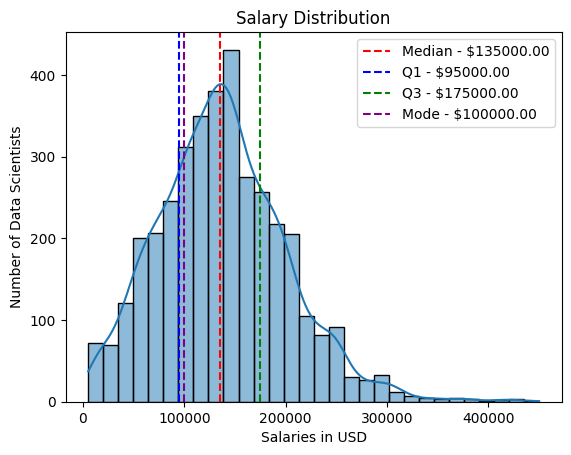

In [46]:
# Distribution plot of salary and plotting its Q1, Q3, median, and mode.

sns.histplot(df["salary_in_usd"], bins=30, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salaries in USD")
plt.ylabel("Number of Data Scientists")

median_salary = df["salary_in_usd"].median()
q1_salary = np.percentile(df["salary_in_usd"], 25)
q3_salary = np.percentile(df["salary_in_usd"], 75)
mode_salary = df["salary_in_usd"].mode()[0]

plt.axvline(median_salary, color='red', linestyle='--', label='Median - ${:.2f}'.format(median_salary))
plt.axvline(q1_salary, color='blue', linestyle='--', label='Q1 - ${:.2f}'.format(q1_salary))
plt.axvline(q3_salary, color='green', linestyle='--', label='Q3 - ${:.2f}'.format(q3_salary))
plt.axvline(mode_salary, color='purple', linestyle='--', label='Mode - ${:.2f}'.format(mode_salary))
plt.legend()

plt.show()



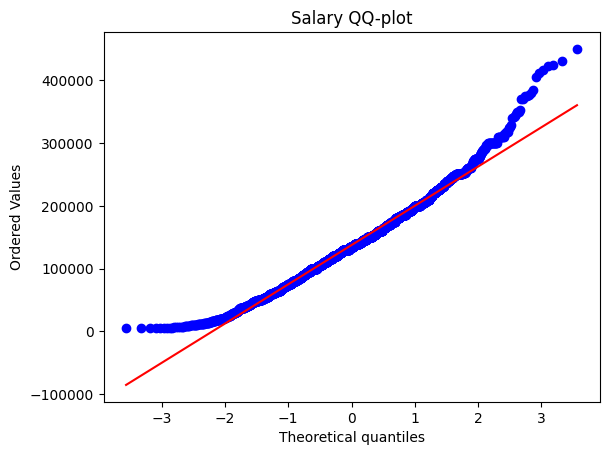

In [47]:

# QQ-plot to check how the salary variable does not follow a normal distribution.
probplot(df["salary_in_usd"], plot=plt)
plt.title("Salary QQ-plot")

plt.show()



In [48]:

# Calculate the average salary per year

average_salary_per_year = df.groupby("work_year")["salary_in_usd"].median().reset_index()

average_salary_per_year = average_salary_per_year.sort_values("work_year")

# Calculate how much the average salary increased year by year in quantity and then in %
# create the variables initialized to 0 and then use a for loop to iterate

average_salary_per_year['difference'] = 0
average_salary_per_year['change %'] = 0

for i in range(1, len(average_salary_per_year)):
    # Calculate the salary difference from the previous year
    average_salary_per_year.loc[i, 'difference'] = average_salary_per_year.loc[i, 'salary_in_usd'] - average_salary_per_year.loc[i-1, 'salary_in_usd']
    
    # Calculate the percentage change from the previous year
    average_salary_per_year.loc[i, 'change %'] = (average_salary_per_year.loc[i, 'difference'] / average_salary_per_year.loc[i-1, 'salary_in_usd']) * 100

average_salary_per_year['change %'] = average_salary_per_year['change %'].astype(int)



C:\Users\Hp\AppData\Local\Temp\ipykernel_12496\2884235731.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '9.491548621090809' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  average_salary_per_year.loc[i, 'change %'] = (average_salary_per_year.loc[i, 'difference'] / average_salary_per_year.loc[i-1, 'salary_in_usd']) * 100


In [49]:
average_salary_per_year

,work_year,salary_in_usd,difference,change %
0,2020,73065.0,0,0
1,2021,80000.0,6935,9
2,2022,131300.0,51300,64
3,2023,143860.0,12560,9


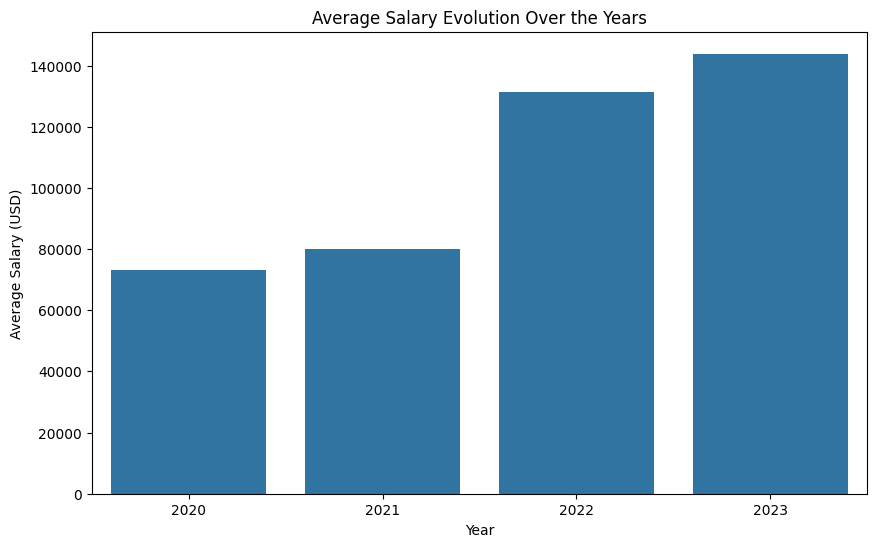

In [50]:
# Bar plot of the average salary per year
plt.figure(figsize=(10, 6))
sns.barplot(x="work_year", y="salary_in_usd", data=average_salary_per_year)
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary Evolution Over the Years")
plt.show()


"The 'salary' variable follows a positively skewed distribution with kurtosis lower than that of a normal distribution. Salaries range from $5,132 to $450,000, with a mean of $137,570. The most common salary is $100,000, mainly observed in mid-level and senior roles in medium-sized companies in the Americas, especially in the United States. However, the salary distribution is not normal. In terms of annual evolution, a significant increase of 64% in the average salary is observed from 2021 to 2022, and a 9% increase from 2022 to 2023."

# 2. experience_lavel

experience_level
Senior         2516
Mid-level       805
Entry-level     320
Executive       114
Name: count, dtype: int64


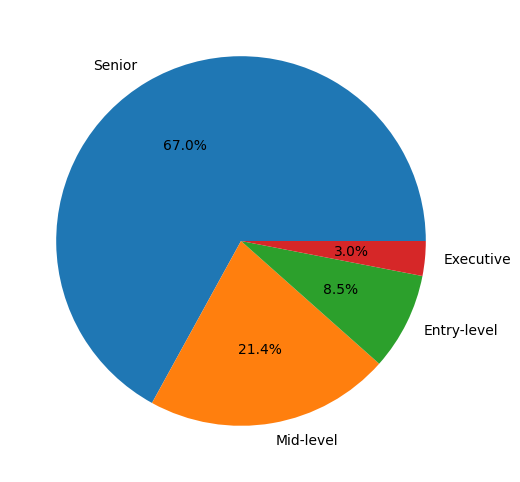

In [51]:
# Count the number of positions by experience level
experience_counts = df['experience_level'].value_counts()
print(experience_counts)

# Pie chart
plt.figure(figsize=(15, 6))
plt.pie(experience_counts, labels=experience_counts.index, autopct='%1.1f%%')
plt.show()


In [52]:
# Median salary by experience level
median_salary_experience = df.groupby('experience_level')['salary_in_usd'].median().sort_values(ascending=False)
print(median_salary_experience)


experience_level
Executive      196000.0
Senior         146000.0
Mid-level      100000.0
Entry-level     70000.0
Name: salary_in_usd, dtype: float64


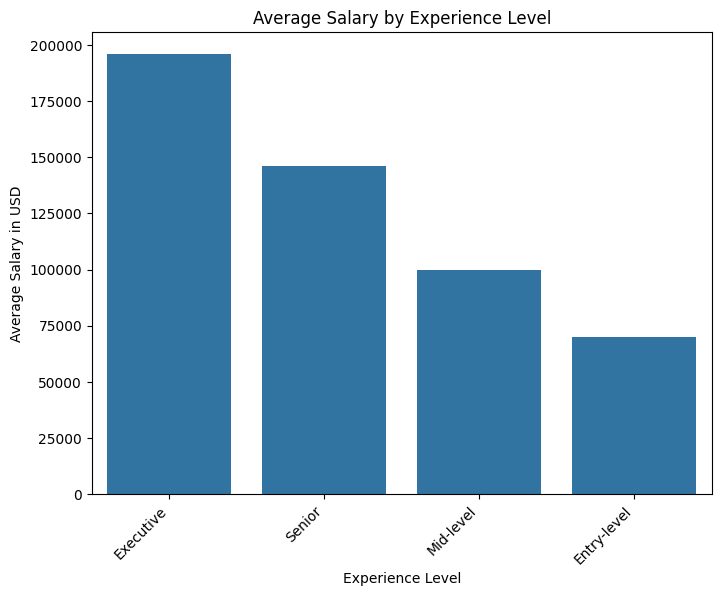

In [53]:

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=median_salary_experience.index, y=median_salary_experience.values)
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.show()


experience_level  Entry-level  Executive  Mid-level  Senior
work_year                                                  
2020                       23          3         32      18
2021                       55         10         92      73
2022                      124         41        361    1138
2023                      118         60        320    1287
experience_level  Entry-level  Executive  Mid-level     Senior
work_year                                                     
2020                   7.1875   2.631579   3.975155   0.715421
2021                  17.1875   8.771930  11.428571   2.901431
2022                  38.7500  35.964912  44.844720  45.230525
2023                  36.8750  52.631579  39.751553  51.152623


<Figure size 1000x600 with 0 Axes>

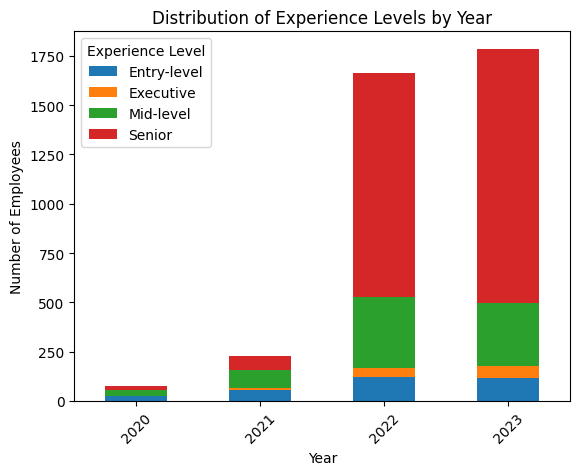

In [54]:
# Frequency table of experience levels by year
experience_by_year = df.groupby(["work_year", "experience_level"]).size().unstack()

print(experience_by_year)

# Convert the frequency table to percentages
experience_by_year_percentages = experience_by_year.apply(lambda x: (x / x.sum()) * 100)

print(experience_by_year_percentages)

# Stacked bar chart of the distribution of experience levels by year
plt.figure(figsize=(10, 6))
experience_by_year.plot(kind="bar", stacked=True)
plt.xlabel("Year")
plt.ylabel("Number of Employees")
plt.title("Distribution of Experience Levels by Year")
plt.xticks(rotation=45)
plt.legend(title='Experience Level')
plt.show()


    work_year experience_level  salary_in_usd
0        2020      Entry-level        45896.0
1        2020        Executive        79833.0
2        2020        Mid-level        78395.5
3        2020           Senior       118552.0
4        2021      Entry-level        55000.0
5        2021        Executive       151833.5
6        2021        Mid-level        72606.0
7        2021           Senior       120000.0
8        2022      Entry-level        61252.0
9        2022        Executive       187200.0
10       2022        Mid-level        98506.0
11       2022           Senior       142063.5
12       2023      Entry-level        85000.0
13       2023        Executive       200000.0
14       2023        Mid-level       109685.5
15       2023           Senior       150000.0


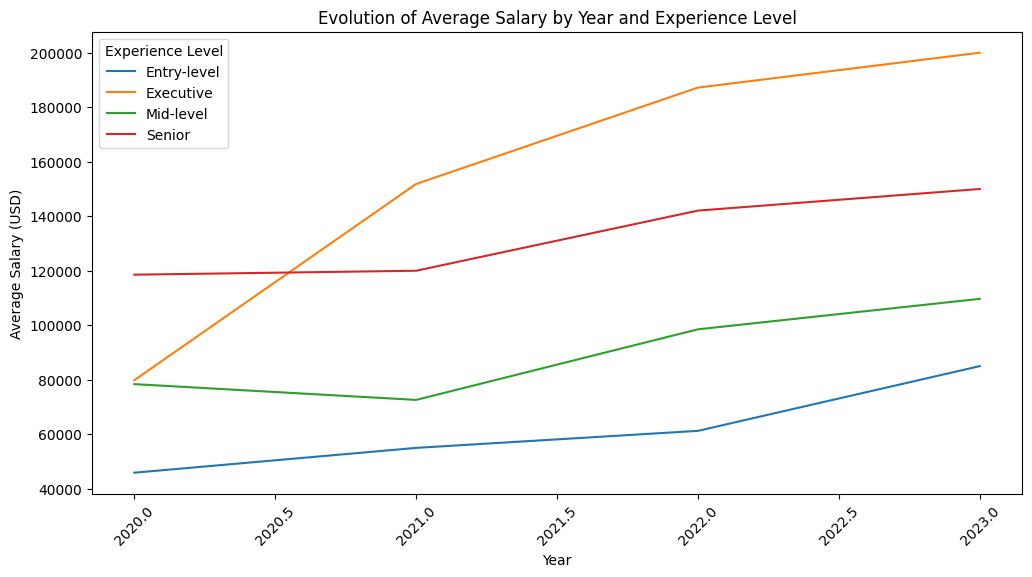

In [55]:
# Calculate the average salary by year and experience level
average_salary_by_year_and_experience = df.groupby(["work_year", "experience_level"])["salary_in_usd"].median().reset_index()

print(average_salary_by_year_and_experience)

# Line plot showing the evolution of average salary by year and experience level
plt.figure(figsize=(12, 6))
sns.lineplot(x="work_year", y="salary_in_usd", hue="experience_level", data=average_salary_by_year_and_experience)
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.title("Evolution of Average Salary by Year and Experience Level")
plt.xticks(rotation=45)
plt.legend(title='Experience Level')
plt.show()


The variable "experience_level" indicates the experience level of workers in their current roles. The distribution of this variable is as follows:

- Senior: 2516
- Mid-level: 805
- Entry-level: 320
- Executive: 114

This distribution shows that the majority of workers are at the Senior level, followed by Mid-level, Entry-level, and finally Executive.

Furthermore, we found a direct relationship between the experience level and the average salary. Employees at the Executive level receive the highest average salary, followed by Senior, Mid-level, and finally Entry-level.

# 3. employment_type

employment_type
Full-time    3718
Part-time      17
Contract       10
Freelance      10
Name: count, dtype: int64


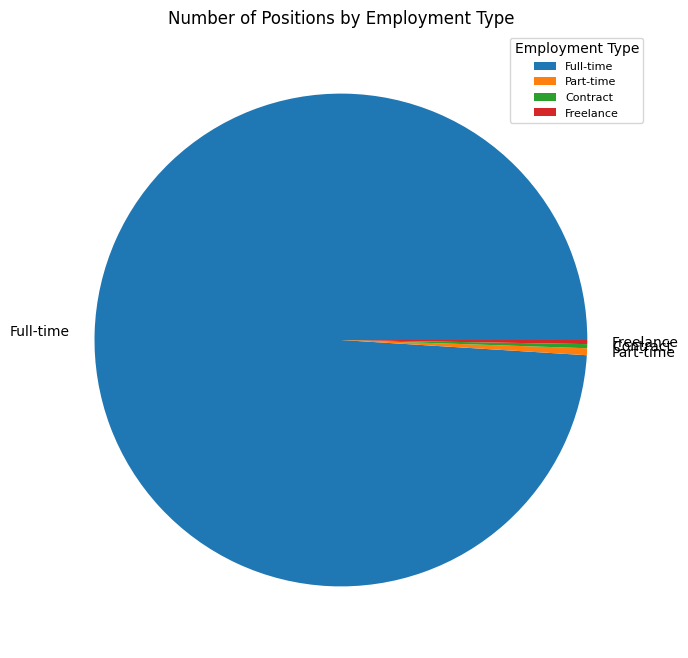

In [56]:
# Count the number of positions by employment type
employment_type_counts = df['employment_type'].value_counts()
print(employment_type_counts)

# Create a pie chart
plt.figure(figsize=(15, 8))
plt.pie(employment_type_counts, labels=employment_type_counts.index)
plt.title('Number of Positions by Employment Type')
plt.legend(employment_type_counts.index, title='Employment Type', loc='best', fontsize=8)
plt.show()

In [57]:
# Calculate median salary by employment type
median_salary_by_employment_type = df.groupby('employment_type')['salary_in_usd'].median().sort_values(ascending=False)
print(median_salary_by_employment_type)


employment_type
Full-time    135000.0
Contract      75000.0
Freelance     50000.0
Part-time     21669.0
Name: salary_in_usd, dtype: float64


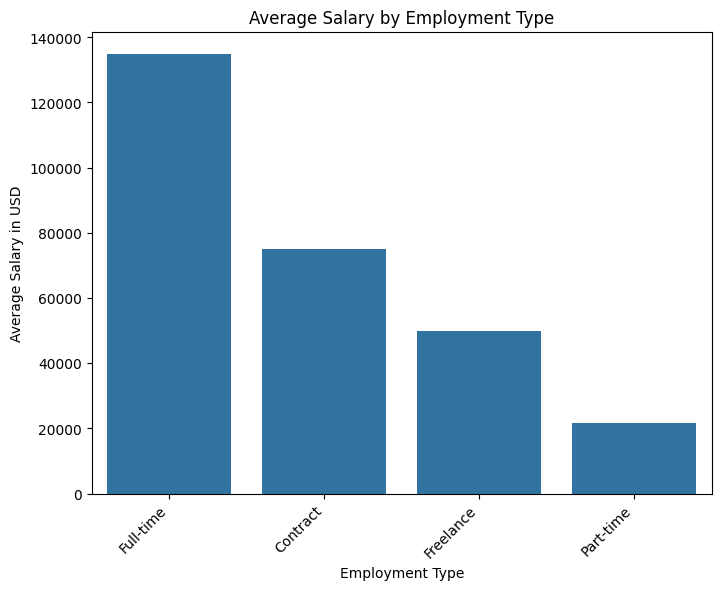

In [58]:
# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=median_salary_by_employment_type.index, y=median_salary_by_employment_type.values)
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.show()


    work_year employment_type  salary_in_usd
0        2020        Contract       100000.0
1        2020       Freelance        60000.0
2        2020       Full-time        75544.0
3        2020       Part-time        18817.5
4        2021        Contract       270000.0
5        2021       Freelance        20000.0
6        2021       Full-time        82500.0
7        2021       Part-time        12000.0
8        2022        Contract        45234.5
9        2022       Freelance        75000.0
10       2022       Full-time       132000.0
11       2022       Part-time        52533.0
12       2023        Contract        27750.0
13       2023       Freelance        50000.0
14       2023       Full-time       143862.5
15       2023       Part-time        17779.0


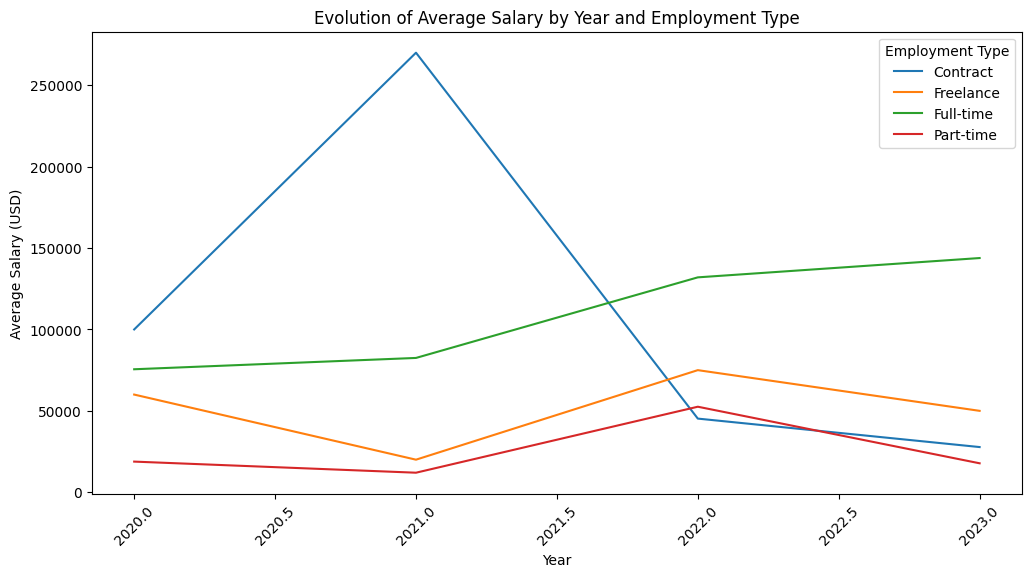

In [59]:
# Calculate average salary by year and employment type
average_salary_by_year_and_employment = df.groupby(["work_year", "employment_type"])["salary_in_usd"].median().reset_index()

# Display the resulting DataFrame
print(average_salary_by_year_and_employment)

# Line plot showing the evolution of average salary by year and employment type
plt.figure(figsize=(12, 6))
sns.lineplot(x="work_year", y="salary_in_usd", hue="employment_type", data=average_salary_by_year_and_employment)
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.title("Evolution of Average Salary by Year and Employment Type")
plt.xticks(rotation=45)
plt.legend(title='Employment Type')
plt.show()


The majority of workers in the dataset are employed full-time (99.2%). Other employment types, such as part-time work, contracts, and freelance positions, make up a smaller proportion of the workforce. There is a direct correlation between employment type and salary: full-time workers earn a higher average salary, followed by contract workers, freelancers, and, lastly, part-time workers.

# 4. Company_size

In [60]:
# Calculate the average salary by company size and the count
average_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].median().sort_values(ascending=False)
count_by_company_size = df['company_size'].value_counts()

# Create a DataFrame with the information
company_size_data = pd.DataFrame({'Average Salary (USD)': average_salary_by_company_size,
                     'Number of Positions': count_by_company_size})
print(company_size_data)


              Average Salary (USD)  Number of Positions
company_size                                           
M                         140000.0                 3153
L                         108500.0                  454
S                          62146.0                  148


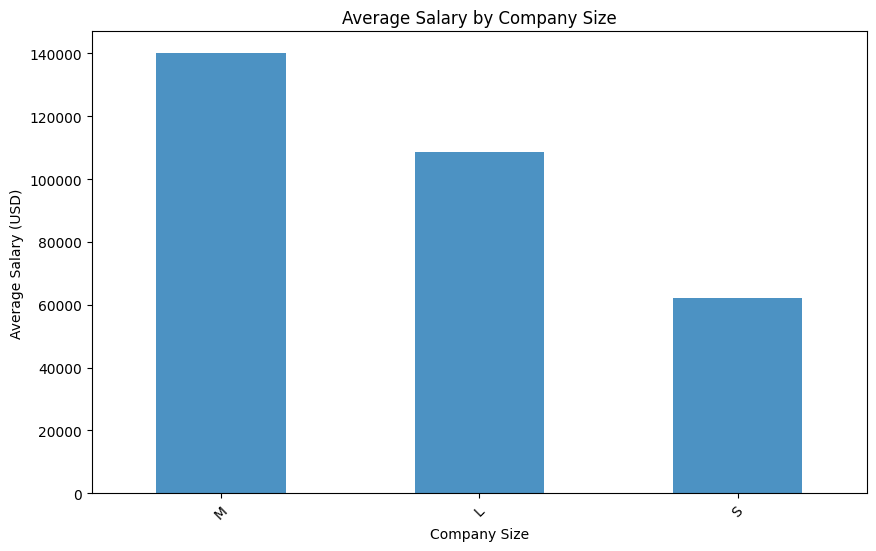

In [61]:
# Bar chart
plt.figure(figsize=(10, 6))
company_size_data['Average Salary (USD)'].plot(kind='bar', alpha=0.8)
plt.xticks(rotation=45)
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Company Size')
plt.show()


    work_year company_size  salary_in_usd
0        2020            L        85000.0
1        2020            M        96500.0
2        2020            S        51321.0
3        2021            L        90734.0
4        2021            M        64411.5
5        2021            S        76833.0
6        2022            L       120000.0
7        2022            M       135000.0
8        2022            S        58418.5
9        2023            L       123700.0
10       2023            M       145000.0
11       2023            S        74875.5


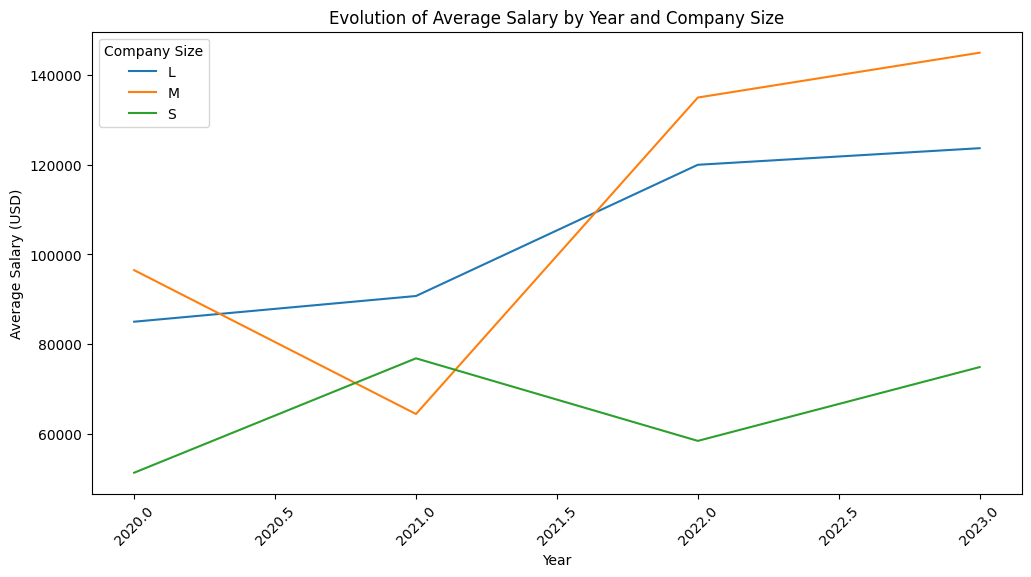

In [62]:
# Calculate the average salary by year and company size
average_salary_by_year_and_size = df.groupby(["work_year", "company_size"])["salary_in_usd"].median().reset_index()

print(average_salary_by_year_and_size)

# Line plot showing the evolution of average salary by year and company size
plt.figure(figsize=(12, 6))
sns.lineplot(x="work_year", y="salary_in_usd", hue="company_size", data=average_salary_by_year_and_size)
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.title("Evolution of Average Salary by Year and Company Size")
plt.xticks(rotation=45)
plt.legend(title='Company Size')
plt.show()


"Medium-sized (M) companies dominate the dataset, offering the majority of data science positions. They also pay the highest average salary ($140,000). Large (L) and small (S) companies have less representation and lower average salaries. The evolution of average salary over time shows overall growth across all company sizes, although medium-sized companies consistently maintain the top position in terms of salary."

# 5. Company_location

In [63]:
def analyze_count_and_percentage(df, column):
    """
    Performs the analysis of count and percentage for a specific column of a DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        column (str): The name of the column to analyze.

    Returns:
        data_analysis (DataFrame): DataFrame with the count and percentage of data for the given column, sorted in descending order.
    """
    # Count of data per value in the column
    count_per_value = df[column].value_counts()

    # Percentage of data for each value in the column
    percentage_per_value = (count_per_value / len(df)) * 100

    # DataFrame with the count and percentage of data for the given column
    data_analysis = pd.DataFrame({'count_of_data': count_per_value,
                                 'percentage_of_data': percentage_per_value})

    # Sort the DataFrame by count of data in descending order
    data_analysis = data_analysis.sort_values('percentage_of_data', ascending=False)

    return data_analysis


In [64]:
data_location = analyze_count_and_percentage(df, "company_location_c")
data_location = data_location.head(10)

data_location

,count_of_data,percentage_of_data
company_location_c,,
United States of America,3040,80.958722
United Kingdom,172,4.580559
Canada,87,2.316911
Spain,77,2.050599
India,58,1.544607
Germany,56,1.491345
France,34,0.905459
Brazil,15,0.399467
Portugal,14,0.372836


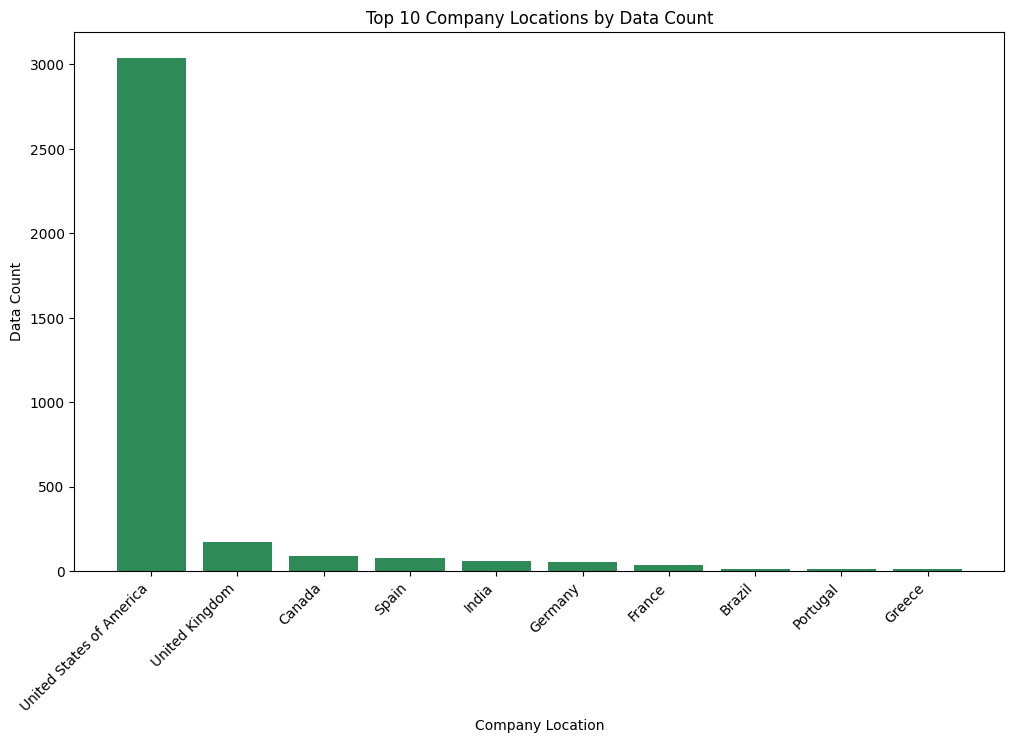

In [65]:
# Data for the plot
locations = data_location.index
counts = data_location['count_of_data']

# Create the plot
plt.figure(figsize=(12, 7))
plt.bar(locations, counts, color='seagreen')
plt.xlabel('Company Location')
plt.ylabel('Data Count')
plt.title('Top 10 Company Locations by Data Count')
plt.xticks(rotation=45, ha="right")

plt.show()


In [66]:
# Create a funnel chart with the top 10 countries

countries = data_location.index.tolist()
data_count = data_location['count_of_data'].tolist()

px.funnel(
    y=countries,
    x=data_count,
    title='Top 8 Countries for Data Science Job Positions'
)


         company_location_c  salary_in_usd
9  United States of America       145000.0
1                    Canada       120000.0
8            United Kingdom        79513.0
3                   Germany        72721.5
2                    France        58969.5
6                  Portugal        52932.5
4                    Greece        50216.0
7                     Spain        47280.0
0                    Brazil        42000.0
5                     India        18276.0


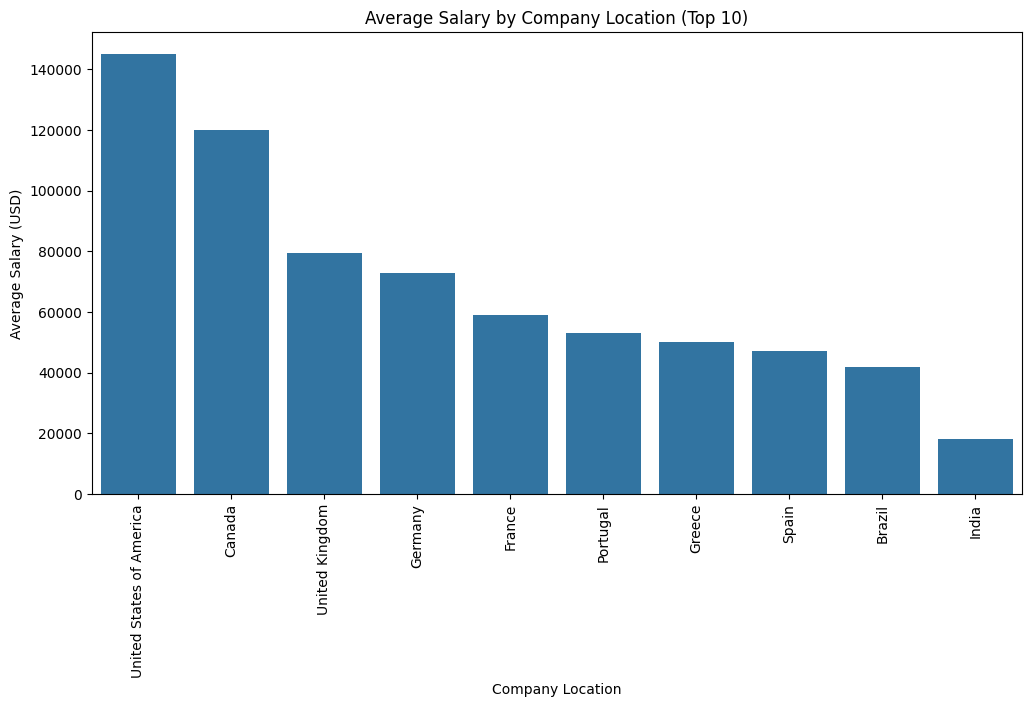

In [67]:

# Titles with more than 5 job positions
filtered_locations = data_location[data_location["count_of_data"] > 5].index

# Original DataFrame for the selected locations
filtered_df_location = df[df["company_location_c"].isin(filtered_locations)]

# Average salary by location for the selected titles
average_salary_by_location = filtered_df_location.groupby("company_location_c")["salary_in_usd"].median().reset_index()

# Sort titles by average salary in descending order
average_salary_by_location = average_salary_by_location.sort_values("salary_in_usd", ascending=False)

average_salary_by_location = average_salary_by_location.head(10)
print(average_salary_by_location)

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="company_location_c", y="salary_in_usd", data=average_salary_by_location)
plt.xlabel("Company Location")
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary by Company Location (Top 10)")
plt.xticks(rotation=90)
plt.show()


The data shows that the majority of data science job positions are located in the United States, followed by the United Kingdom and Canada. The highest average salary is offered in the United States, followed by Canada and the United Kingdom. Over time, the average data science salary has exhibited a general increase in countries with data available for each year between 2020 and 2023.

# 6. Job_title

In [68]:

job_titles_data = analyze_count_and_percentage(df, "job_title")
print(job_titles_data.head(10))


                           count_of_data  percentage_of_data
job_title                                                   
Data Engineer                       1040           27.696405
Data Scientist                       840           22.370173
Data Analyst                         612           16.298269
Machine Learning Engineer            289            7.696405
Analytics Engineer                   103            2.743009
Data Architect                       101            2.689747
Research Scientist                    82            2.183755
Data Science Manager                  58            1.544607
Applied Scientist                     58            1.544607
Research Engineer                     37            0.985353


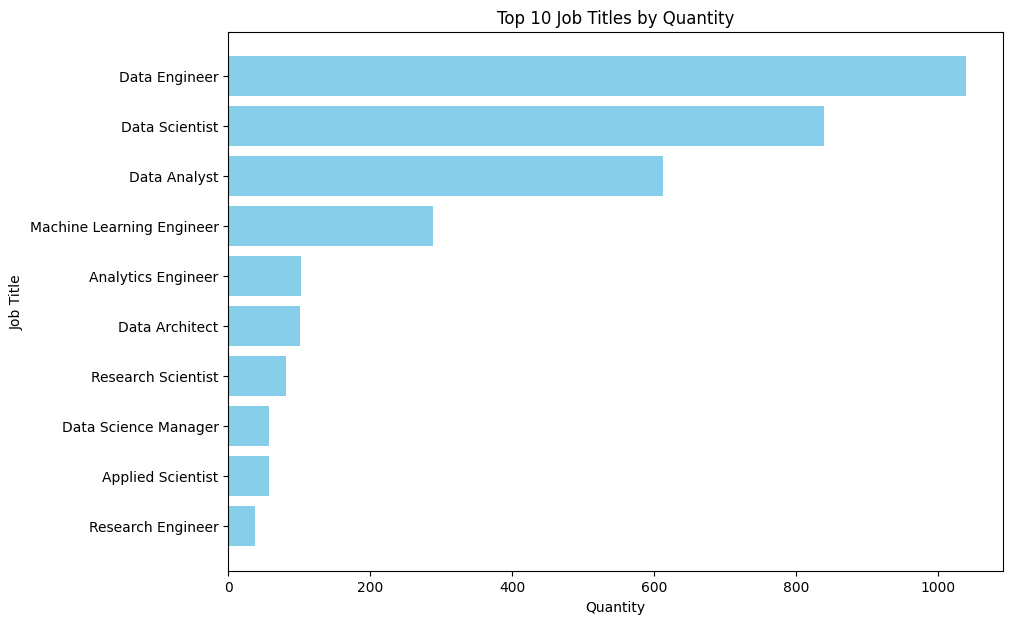

In [71]:
# Data for the chart
titles = job_titles_data.head(10).index
quantities = job_titles_data['count_of_data'].head(10)

# Create the chart
plt.figure(figsize=(10, 7))
plt.barh(titles, quantities, color='skyblue')
plt.xlabel('Quantity')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles by Quantity')
plt.gca().invert_yaxis()
plt.show()


In [72]:
# Step 1: Filter the original DataFrame to obtain only the rows of the top 10 most common job titles
top_10 = job_titles_data.head(10).index.tolist()
df_top_10 = df[df['job_title'].isin(top_10)]

# Step 2: Calculate the average salary and the most common experience level for each job title

# Average salary by job title
average_salary_title = df_top_10.groupby('job_title')['salary_in_usd'].median()
overall_average_top = df_top_10['salary_in_usd'].median()
print(overall_average_top)

# Most common experience level by title
experience_level_title = df_top_10.groupby('job_title')['experience_level'].agg(lambda x: x.value_counts().index[0])

result = pd.DataFrame({'Average Salary (USD)': average_salary_title, 'Experience Level': experience_level_title})
result


136000.0


,Average Salary (USD),Experience Level
job_title,,
Analytics Engineer,143860.0,Senior
Applied Scientist,191737.5,Senior
Data Analyst,106020.0,Senior
Data Architect,160000.0,Senior
Data Engineer,135000.0,Senior
Data Science Manager,183780.0,Senior
Data Scientist,141525.0,Senior
Machine Learning Engineer,150000.0,Senior
Research Engineer,155000.0,Senior


                        job_title  salary_in_usd
46         Data Science Tech Lead       375000.0
19           Cloud Data Architect       250000.0
35                      Data Lead       212500.0
28            Data Analytics Lead       211254.5
58                   Head of Data       202500.0
..                            ...            ...
86           Product Data Analyst        20000.0
91             Staff Data Analyst        15000.0
0   3D Computer Vision Researcher        15000.0
87         Product Data Scientist         8000.0
80             Power BI Developer         5409.0

[93 rows x 2 columns]


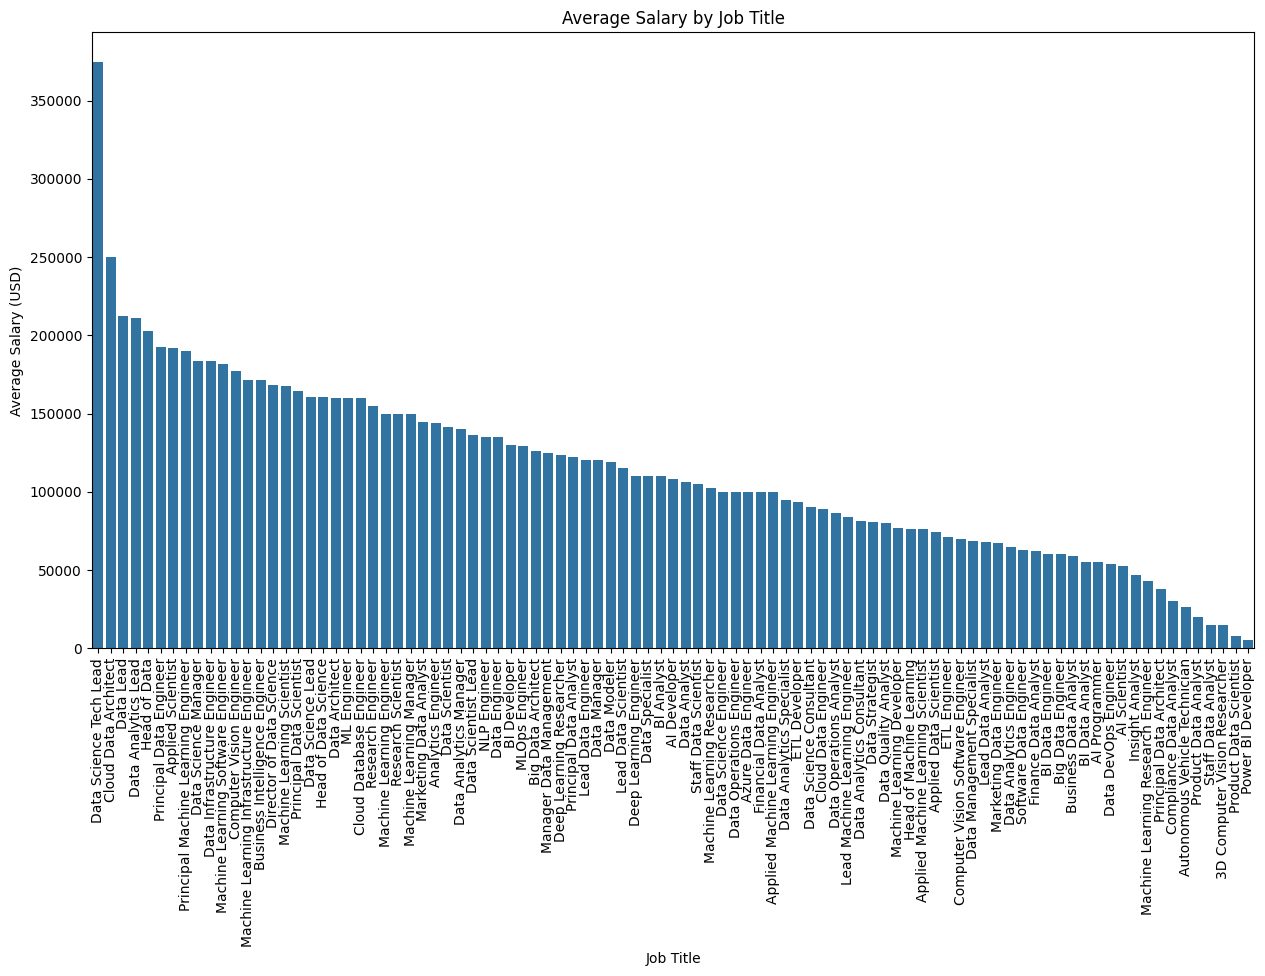

In [73]:
# Average salary by job title
average_salary_by_title = df.groupby("job_title")["salary_in_usd"].median().reset_index()

average_salary_by_title = average_salary_by_title.sort_values("salary_in_usd", ascending=False)
print(average_salary_by_title)

# Bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x="job_title", y="salary_in_usd", data=average_salary_by_title)
plt.xlabel("Job Title")
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary by Job Title")
plt.xticks(rotation=90) 
plt.show()


The most common job titles are "Data Engineer," "Data Scientist," and "Data Analyst."
The average salary varies significantly across different job titles.
Most of the top 10 positions require a 'Senior' level of experience.
The salary has shown an upward trend from 2020 to 2023 for most of the job titles.

# 7. Remote_ratio 

In [74]:
data_ratio = analyze_count_and_percentage(df, "remote_ratio")
data_ratio

,count_of_data,percentage_of_data
remote_ratio,,
in company,1923,51.211718
remote,1643,43.754993
hybrid,189,5.033289


In [75]:
prom_salary_remote = df.groupby('remote_ratio')['salary_in_usd'].median().sort_values(ascending=False)
print(prom_salary_remote)


remote_ratio
in company    139600.0
remote        135000.0
hybrid         63312.0
Name: salary_in_usd, dtype: float64


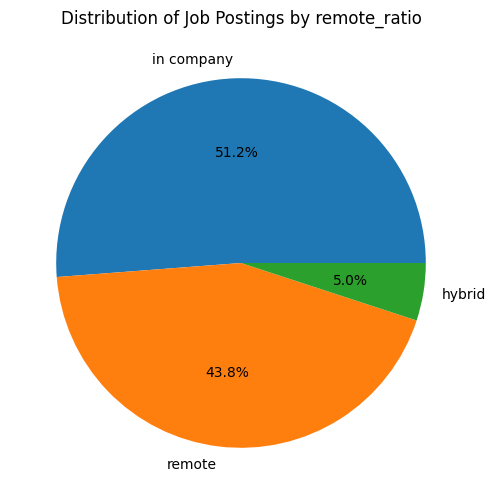

In [77]:
# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(data_ratio["count_of_data"], labels=data_ratio.index, autopct='%1.1f%%')
plt.title('Distribution of Job Postings by remote_ratio')
plt.show()

remote_ratio  hybrid  in company  remote
work_year                               
2020              21          16      39
2021              76          34     120
2022              62         711     891
2023              30        1162     593


<Figure size 1000x600 with 0 Axes>

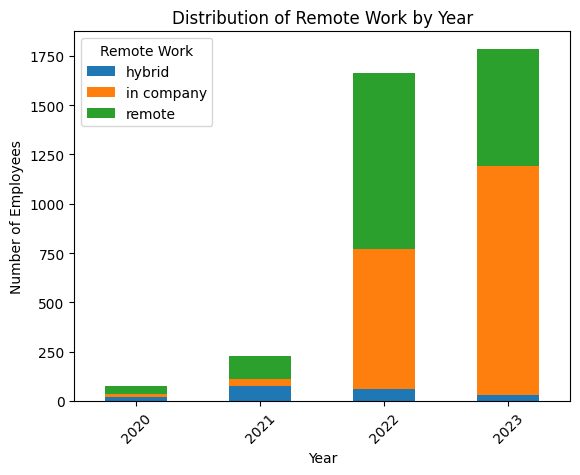

In [78]:
# Frequency table of remote work by year
remote_work_by_year = df.groupby(["work_year", "remote_ratio"]).size().unstack()

print(remote_work_by_year)

# Stacked bar chart of the remote work distribution by year
plt.figure(figsize=(10, 6))
remote_work_by_year.plot(kind="bar", stacked=True)
plt.xlabel("Year")
plt.ylabel("Number of Employees")
plt.title("Distribution of Remote Work by Year")
plt.xticks(rotation=45)
plt.legend(title='Remote Work')
plt.show()


remote_ratio     hybrid  in company     remote
work_year                                     
2020          27.631579   21.052632  51.315789
2021          33.043478   14.782609  52.173913
2022           3.725962   42.728365  53.545673
2023           1.680672   65.098039  33.221289


<Figure size 1000x600 with 0 Axes>

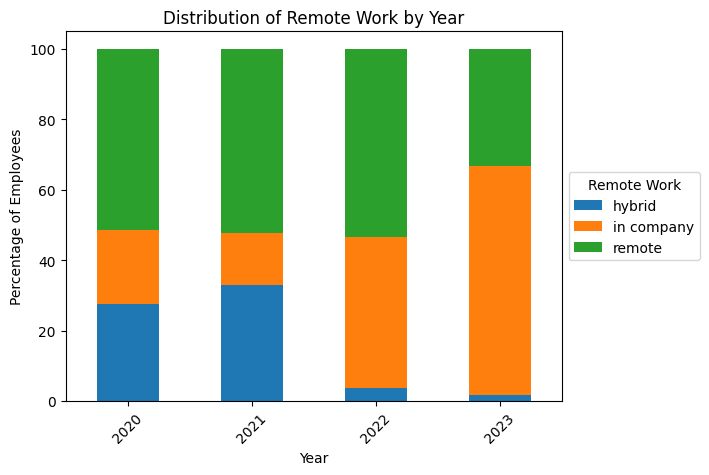

In [79]:
remote_work_by_year = df.groupby(["work_year", "remote_ratio"]).size().unstack()

remote_work_by_year_percentage = remote_work_by_year.apply(lambda row: row / row.sum() * 100, axis=1)

print(remote_work_by_year_percentage)

plt.figure(figsize=(10, 6))
remote_work_by_year_percentage.plot(kind="bar", stacked=True)
plt.xlabel("Year")
plt.ylabel("Percentage of Employees")
plt.title("Distribution of Remote Work by Year")
plt.xticks(rotation=45)
plt.legend(title='Remote Work', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_12496\1249076765.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




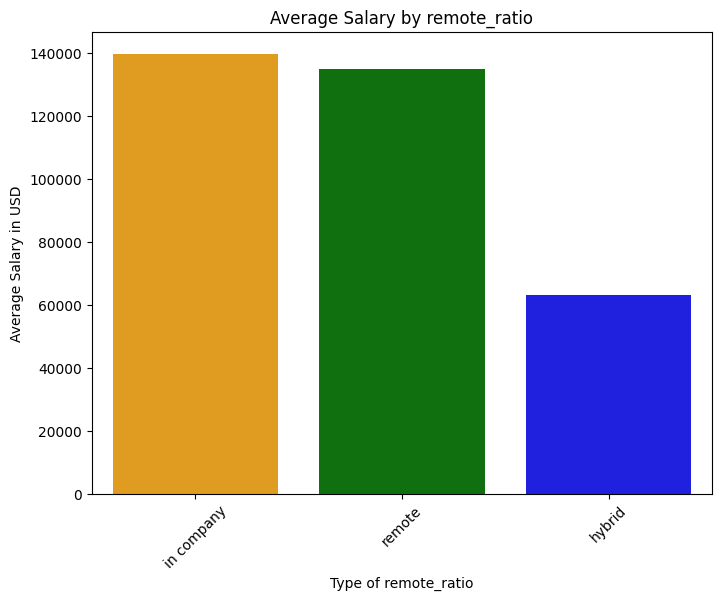

In [80]:
colors = {
    'hybrid': 'blue',
    'remote': 'green',
    'in company': 'orange'
}

# Order the colors according to the order of bars in the chart
ordered_colors = [colors[remote_ratio] for remote_ratio in prom_salary_remote.index]

# Bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=prom_salary_remote.index, y=prom_salary_remote.values, palette=ordered_colors)
plt.title('Average Salary by remote_ratio')
plt.xlabel('Type of remote_ratio')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45)
plt.show()


    work_year remote_ratio  salary_in_usd
0        2020       hybrid        62726.0
1        2020   in company        50750.5
2        2020       remote        87000.0
3        2021       hybrid        63771.0
4        2021   in company        80916.5
5        2021       remote        90000.0
6        2022       hybrid        65929.0
7        2022   in company       130000.0
8        2022       remote       136000.0
9        2023       hybrid        53654.0
10       2023   in company       145000.0
11       2023       remote       141600.0


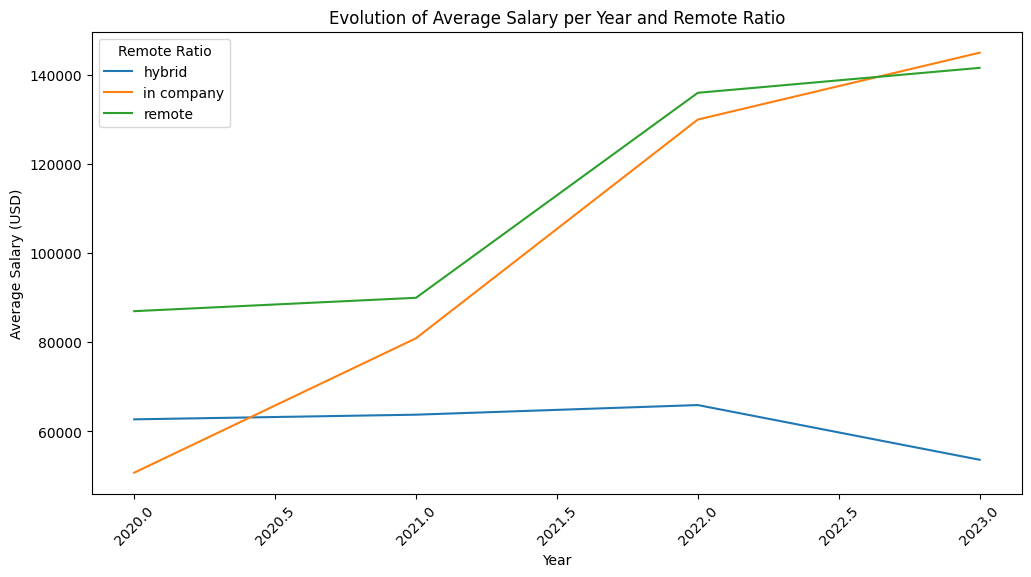

In [81]:
# Calculate the average salary per year and remote ratio
average_salary_by_year_and_rr = df.groupby(["work_year", "remote_ratio"])["salary_in_usd"].median().reset_index()

print(average_salary_by_year_and_rr)

# Line plot showing the evolution of average salary per year and remote ratio
plt.figure(figsize=(12, 6))
sns.lineplot(x="work_year", y="salary_in_usd", hue="remote_ratio", data=average_salary_by_year_and_rr)
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.title("Evolution of Average Salary per Year and Remote Ratio")
plt.xticks(rotation=45)
plt.legend(title='Remote Ratio')
plt.show()

In [84]:
# Getting the top 8 countries from the 'salario_promedio_por_ubicacion' variable
countries = data_location.index.tolist()

# Filtering the original DataFrame for these countries
df_filtered = df[df['company_location_c'].isin(countries)]

# Step 1: Count by country and remote type
grouped = df_filtered.groupby(['company_location_c', 'remote_ratio']).size().unstack(fill_value=0)

# Step 2: Total hires by country
total_by_country = df_filtered['company_location_c'].value_counts()

# Step 3: Calculate the percentage
for column in grouped.columns:
    grouped[column] = (grouped[column] / total_by_country) * 100

# Step 4: Filter and sort for remote and in-company jobs

# For remote jobs
remote_sorted = grouped.sort_values(by='remote', ascending=False)
remote_table = remote_sorted[['remote']]

# For in-company jobs
in_company_sorted = grouped.sort_values(by='in company', ascending=False)
in_company_table = in_company_sorted[['in company']]

# Display the tables
print(remote_table)
print("\n")
print(in_company_table)


remote_ratio                 remote
company_location_c                 
Brazil                    86.666667
Greece                    71.428571
Canada                    52.873563
India                     51.724138
Germany                   44.642857
United States of America  43.782895
United Kingdom            37.790698
France                    35.294118
Spain                     29.870130
Portugal                  28.571429


remote_ratio              in company
company_location_c                  
Spain                      63.636364
United States of America   54.901316
United Kingdom             52.325581
Portugal                   50.000000
Canada                     33.333333
Germany                    28.571429
Greece                     14.285714
India                      13.793103
Brazil                     13.333333
France                      5.882353


This analysis examines the distribution of data science workers according to their work mode (in-company, remote, or hybrid). We found that 51.2% of the workers are in-company, 43.8% are remote, and 5% are hybrid. Additionally, the average salaries in USD are $139,600 for in-company workers, $135,000 for remote workers, and $63,312 for hybrid workers.

In terms of the annual distribution, there is an increase in the proportion of in-company and remote workers from 2020 to 2023, while hybrid work remains low.

Finally, we found significant variations in the proportions of remote work among the top ten countries with the most data science workers, with Brazil and Greece having the highest proportion of remote workers.

# 8 Employee_residence

In [85]:
data_residence = analyze_count_and_percentage(df, "employee_residence_c")
print(data_residence)

                          count_of_data  percentage_of_data
employee_residence_c                                       
United States of America           3004           80.000000
United Kingdom                      167            4.447403
Canada                               85            2.263648
Spain                                80            2.130493
India                                71            1.890812
...                                 ...                 ...
Malaysia                              1            0.026631
Jersey                                1            0.026631
New Zealand                           1            0.026631
Algeria                               1            0.026631
Malta                                 1            0.026631

[78 rows x 2 columns]


        employee_residence_c  salary_in_usd
20  United States of America       145000.0
4                     Canada       120000.0
9                    Ireland       101943.0
19            United Kingdom        80036.0
6                    Germany        76833.0
1                  Australia        75050.0
11                     Japan        74000.0
13               Netherlands        73546.0
2                    Austria        68059.5
12                    Mexico        66000.0
5                     France        58969.5
17                  Portugal        52932.5
7                     Greece        52533.0
14                   Nigeria        50000.0
18                     Spain        47281.0
3                     Brazil        45000.0
0                  Argentina        39000.0
16                    Poland        38987.0
10                     Italy        33836.0
15                  Pakistan        30000.0
8                      India        20670.0


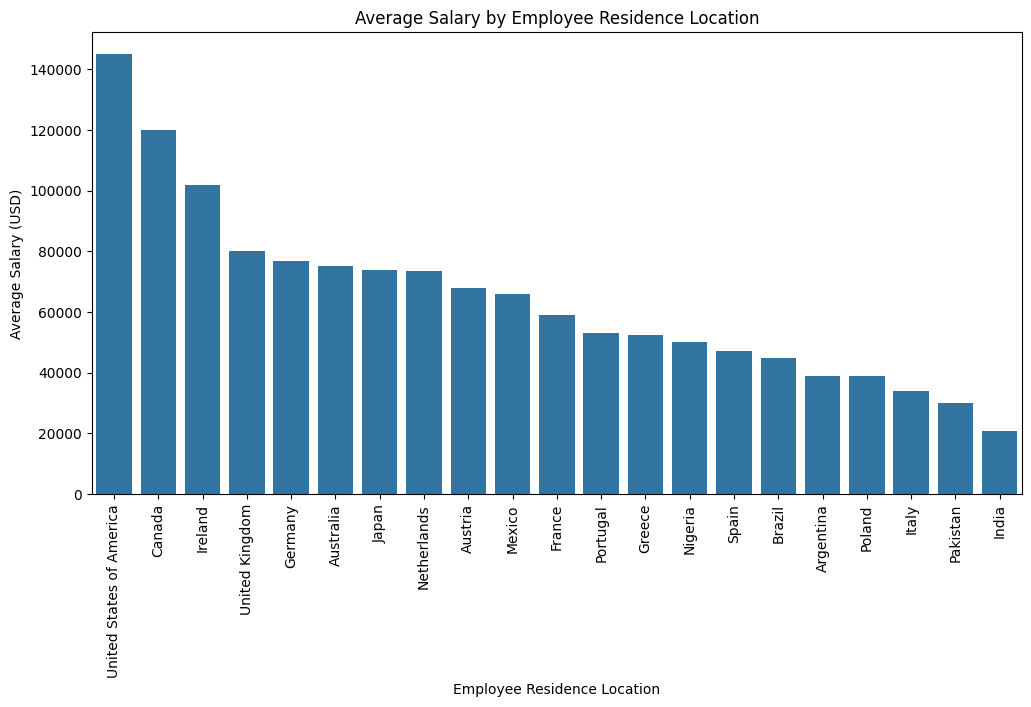

In [87]:
# Filter residence locations with more than 5 employees
filtered_residences = data_residence[data_residence["count_of_data"] > 5].index

# Filter the original DataFrame by the selected residence locations
filtered_df = df[df["employee_residence_c"].isin(filtered_residences)]

# Calculate the average salary by employee residence location only for the selected locations
average_salary_by_residence = filtered_df.groupby("employee_residence_c")["salary_in_usd"].median().reset_index()

# Sort the employee residence locations by average salary in descending order
average_salary_by_residence = average_salary_by_residence.sort_values("salary_in_usd", ascending=False)

print(average_salary_by_residence)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="employee_residence_c", y="salary_in_usd", data=average_salary_by_residence)
plt.xlabel("Employee Residence Location")
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary by Employee Residence Location")
plt.xticks(rotation=90)
plt.show()

## 5. Correlations

In [88]:

# Define a list of numeric columns (num_cols) and a list of categorical columns (cat_cols) to be transformed.

num_cols = ['work_year', 'salary_in_usd']
cat_cols = ['experience_level', 'employment_type', 'job_title', 'employee_residence_c', 'company_location_c', 'company_size', 'remote_ratio']

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Encode the categorical columns
cat_cols_encoded = encoder.fit_transform(df[cat_cols])
cat_cols_encoded = pd.DataFrame(data=cat_cols_encoded, columns=cat_cols)

# Create a new DataFrame by combining the numeric and encoded categorical columns
new_df = df[num_cols].join(cat_cols_encoded)
new_df.head()


,work_year,salary_in_usd,experience_level,employment_type,job_title,employee_residence_c,company_location_c,company_size,remote_ratio
0,2023,85847,3.0,2.0,84.0,66.0,62.0,0.0,2.0
1,2023,30000,2.0,0.0,66.0,75.0,70.0,2.0,2.0
2,2023,25500,2.0,0.0,66.0,75.0,70.0,2.0,2.0
3,2023,175000,3.0,2.0,47.0,11.0,12.0,1.0,2.0
4,2023,120000,3.0,2.0,47.0,11.0,12.0,1.0,2.0


In [89]:
# Calculate the Spearman correlation matrix
corr_matrix = new_df.corr(method='spearman')
corr_matrix

,work_year,salary_in_usd,experience_level,employment_type,job_title,employee_residence_c,company_location_c,company_size,remote_ratio
work_year,1.000000,0.210749,0.158267,-0.010722,-0.022782,0.253402,0.237393,0.142470,-0.122469
salary_in_usd,0.210749,1.000000,0.375241,-0.009378,0.152563,0.488665,0.478019,0.015739,0.047792
experience_level,0.158267,0.375241,1.000000,-0.034185,0.025370,0.322788,0.312936,0.072653,0.063739
employment_type,-0.010722,-0.009378,-0.034185,1.000000,-0.044955,-0.025995,-0.024667,-0.035615,-0.027795
job_title,-0.022782,0.152563,0.025370,-0.044955,1.000000,-0.072470,-0.081129,-0.010304,-0.059490
employee_residence_c,0.253402,0.488665,0.322788,-0.025995,-0.072470,1.000000,0.952139,0.059659,0.068753
company_location_c,0.237393,0.478019,0.312936,-0.024667,-0.081129,0.952139,1.000000,0.078840,0.082396
company_size,0.142470,0.015739,0.072653,-0.035615,-0.010304,0.059659,0.078840,1.000000,0.052993
remote_ratio,-0.122469,0.047792,0.063739,-0.027795,-0.059490,0.068753,0.082396,0.052993,1.000000


In [90]:

# Get the coordinates of correlations greater than 0.81 and not equal to 1
rows, columns = np.where((corr_matrix > 0.81) & (corr_matrix < 1))

# Check if there are correlations greater than 0.81 and not equal to 1
if len(rows) > 0:
    for row, column in zip(rows, columns):
        # Print the row and column pairs with correlations greater than 0.81 and not equal to 1
        print("Row:", corr_matrix.index[row], "- Column:", corr_matrix.columns[column])
else:
    print("There are no correlations greater than 0.81 and not equal to 1.")


Row: employee_residence_c - Column: company_location_c
Row: company_location_c - Column: employee_residence_c


In [91]:

# Select the two specific columns we want to correlate
variables_a = df['employee_residence_c']
variables_b = df['company_location_c']

# Calculate the Spearman correlation coefficient and the p-value
correlation, p_value = spearmanr(variables_a, variables_b)

# Print the Spearman correlation coefficient and the p-value
print("Spearman Correlation Coefficient:", correlation)
print("P-Value:", p_value)

# Check if the correlation is statistically significant
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("There is not enough evidence to claim that the correlation is significant.")


Spearman Correlation Coefficient: 0.9521385973056874
P-Value: 0.0
The correlation is statistically significant.


In [93]:
data_residence_sameC = analyze_count_and_percentage(df, "reside_en_mismo_pais")
data_residence_sameC

,count_of_data,percentage_of_data
reside_en_mismo_pais,,
Yes,3659,97.443409
No,96,2.556591


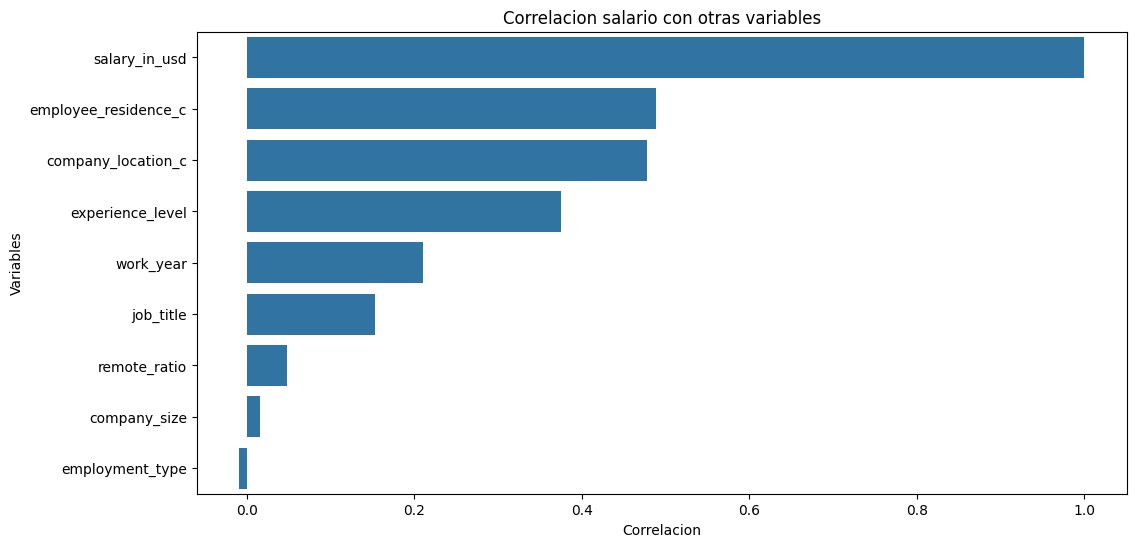

In [94]:
corre_salario_variables = corr_matrix['salary_in_usd'].sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=corre_salario_variables.values, y=corre_salario_variables.index, orient='h')
plt.title('Correlacion salario con otras variables')
plt.xlabel('Correlacion')
plt.ylabel('Variables')
plt.show()

## 6 Test Hipotesis

In [95]:
def check_variable_change(df, variable, category):
    """
    This function performs hypothesis tests to determine if inflation-adjusted salaries for a specific category of a given variable have experienced a significant increase in different years.

    Parameters:
    - df: DataFrame containing the data for analysis.
    - variable: Name of the variable whose category will be analyzed.
    - category: Specific category of the variable for which the analysis will be performed.

    Description:
    The function takes as input a DataFrame "df," the name of a variable "variable," and a specific category "category." It then filters the data to obtain inflation-adjusted salaries corresponding to the given category in different years (2020, 2021, 2022, and 2023). It uses the Mann-Whitney U statistical test to compare salaries in pairs of consecutive years (2020-2021, 2021-2022, and 2022-2023).

    The function prints the results of hypothesis tests for each pair of years, including whether the adjusted salary increased or not between the years and the associated p-value of the test. If the p-value is less than 0.05 for all pairs of years, it is considered that the adjusted salary has experienced a significant increase in all those years.

    Return:
    The function does not have an explicit return value, as its main purpose is to print the results of hypothesis tests for analysis.
    """

    print(f"Category: {category}")

    year1 = 2020
    year2 = 2021
    year3 = 2022
    year4 = 2023

    salaries_year1 = df[(df['work_year'] == year1) & (df[variable] == category)]['salary_in_usd']
    salaries_year2 = df[(df['work_year'] == year2) & (df[variable] == category)]['salary_in_usd']
    salaries_year3 = df[(df['work_year'] == year3) & (df[variable] == category)]['salary_in_usd']
    salaries_year4 = df[(df['work_year'] == year4) & (df[variable] == category)]['salary_in_usd']

    result_1_2 = mannwhitneyu(salaries_year1, salaries_year2, alternative='less')
    result_2_3 = mannwhitneyu(salaries_year2, salaries_year3, alternative='less')
    result_3_4 = mannwhitneyu(salaries_year3, salaries_year4, alternative='less')

    p_value_1_2 = result_1_2.pvalue
    p_value_2_3 = result_2_3.pvalue
    p_value_3_4 = result_3_4.pvalue

    if p_value_1_2 < 0.05 and p_value_2_3 < 0.05 and p_value_3_4 < 0.05:
        increase = "Increased"
    else:
        increase = "Did not increase"

    print(f"{year1} - {year2}: {increase} (p-value: {p_value_1_2:.6f})")
    print(f"{year2} - {year3}: {increase} (p-value: {p_value_2_3:.6f})")
    print(f"{year3} - {year4}: {increase} (p-value: {p_value_3_4:.6f})")


In [96]:
# Testing the function with company_size, L - employment_type, Full-time, and remote_ratio, remote
# Visually observing if salaries have increased for these variable categories.

check_variable_change(df, 'company_size', 'L')
check_variable_change(df, 'experience_level', 'Senior')
check_variable_change(df, 'employment_type', 'Full-time')
check_variable_change(df, 'remote_ratio', 'remote')


Category: L
2020 - 2021: Did not increase (p-value: 0.231907)
2021 - 2022: Did not increase (p-value: 0.013920)
2022 - 2023: Did not increase (p-value: 0.249494)
Category: Senior
2020 - 2021: Did not increase (p-value: 0.517883)
2021 - 2022: Did not increase (p-value: 0.001115)
2022 - 2023: Did not increase (p-value: 0.000008)
Category: Full-time
2020 - 2021: Did not increase (p-value: 0.196211)
2021 - 2022: Did not increase (p-value: 0.000000)
2022 - 2023: Did not increase (p-value: 0.000000)
Category: remote
2020 - 2021: Did not increase (p-value: 0.179611)
2021 - 2022: Did not increase (p-value: 0.000000)
2022 - 2023: Did not increase (p-value: 0.006135)


In [97]:
# Perform the Mann-Whitney U test to compare salary medians for each year to understand if there are significant changes.

years = [2020, 2021, 2022, 2023]

for i in range(len(years)):
    for j in range(i+1, len(years)):
        salaries_i = df[df['work_year'] == years[i]]['salary_in_usd']
        salaries_j = df[df['work_year'] == years[j]]['salary_in_usd']

        # Perform the test
        stat, p = mannwhitneyu(salaries_i, salaries_j)

        print(f"\nComparing {years[i]} vs. {years[j]}:")
        print(f'U Statistic: {stat}')
        print(f'P-value: {p}')

        if p < 0.05:
            print(f"There is a significant difference in median salaries between {years[i]} and {years[j]}.")
        else:
            print(f"There is no significant difference in median salaries between {years[i]} and {years[j]}.")



Comparing 2020 vs. 2021:
U Statistic: 8209.5
P-value: 0.4280231574809945
There is no significant difference in median salaries between 2020 and 2021.

Comparing 2020 vs. 2022:
U Statistic: 33767.5
P-value: 6.025012409530372e-12
There is a significant difference in median salaries between 2020 and 2022.

Comparing 2020 vs. 2023:
U Statistic: 29304.5
P-value: 4.566932933971625e-17
There is a significant difference in median salaries between 2020 and 2023.

Comparing 2021 vs. 2022:
U Statistic: 115712.0
P-value: 2.218674604780811e-22
There is a significant difference in median salaries between 2021 and 2022.

Comparing 2021 vs. 2023:
U Statistic: 102080.0
P-value: 1.8807969501872277e-35
There is a significant difference in median salaries between 2021 and 2023.

Comparing 2022 vs. 2023:
U Statistic: 1284615.5
P-value: 6.8025943406674116e-12
There is a significant difference in median salaries between 2022 and 2023.


In [98]:
# Count the total number of jobs per year
total_by_year = df.groupby('work_year').size()

# Count how many remote jobs there are per year
remote_by_year = df[df['remote_ratio'] == 'remote'].groupby('work_year').size()

# Calculate the percentage of remote jobs per year
percentage_remote = (remote_by_year / total_by_year) * 100

print(percentage_remote)


work_year
2020    51.315789
2021    52.173913
2022    53.545673
2023    33.221289
dtype: float64


In [99]:
# Perform the Mann-Whitney U test to see if there are significant changes between the medians of the remote work percentage.

years = [2020, 2021, 2022, 2023]

for i in range(len(years)):
    for j in range(i+1, len(years)):
        ratio_i = df[df['work_year'] == years[i]]['remote_ratio'].apply(lambda x: 1 if x == 'remote' else 0)
        ratio_j = df[df['work_year'] == years[j]]['remote_ratio'].apply(lambda x: 1 if x == 'remote' else 0)
        
        # Performing the test
        stat, p = mannwhitneyu(ratio_i, ratio_j, alternative="less")

        print(f"\nComparing {years[i]} vs. {years[j]}:")
        print(f'U statistic: {stat}')
        print(f'P-value: {p}')

        if p < 0.05:
            print(f'There is a significant difference in the ratio of remote jobs between {years[i]} and {years[j]}.')
        else:
            print(f'There is no significant difference in the ratio of remote jobs between {years[i]} and {years[j]}.')



Comparing 2020 vs. 2021:
U statistic: 8665.0
P-value: 0.4487823086261842
There is no significant difference in the ratio of remote jobs between 2020 and 2021.

Comparing 2020 vs. 2022:
U statistic: 61822.0
P-value: 0.35164964231620055
There is no significant difference in the ratio of remote jobs between 2020 and 2022.

Comparing 2020 vs. 2023:
U statistic: 80103.5
P-value: 0.9994458017558103
There is no significant difference in the ratio of remote jobs between 2020 and 2023.

Comparing 2021 vs. 2022:
U statistic: 188735.0
P-value: 0.3480055224175624
There is no significant difference in the ratio of remote jobs between 2021 and 2022.

Comparing 2021 vs. 2023:
U statistic: 244180.0
P-value: 0.9999999922693865
There is no significant difference in the ratio of remote jobs between 2021 and 2023.

Comparing 2022 vs. 2023:
U statistic: 1786961.5
P-value: 1.0
There is no significant difference in the ratio of remote jobs between 2022 and 2023.


Based on our analysis and the Mann-Whitney U tests conducted, we can shed light on the initial hypotheses:

Regarding Median Salaries in Data Science:
Our initial hypotheses have not been fully corroborated. While we observed significant changes in salary medians between 2021 and 2023, this trend was not evident between 2020 and 2021. However, when analyzing the subsequent years, it is undeniable that salaries in the field of Data Science have shown a notable increase, partially validating our initial assumption.

Regarding Remote Work:
Contrary to what we might have expected, remote work has not consistently increased year by year. During the first three years of the analysis, the proportion of remote jobs remained stable. However, in 2023, we experienced a significant drop in the percentage of remote jobs, in contrast to in-person or in-company positions. This trend may be influenced, to a large extent, by the conclusion of the most critical phase of the pandemic, leading companies and employees to return to more traditional or in-person work arrangements.

In summary, labor and salary dynamics in the field of Data Science have proven to be susceptible to various factors, including but not limited to global contexts such as a pandemic. These findings provide us with a clearer and nuanced view of the job market in this area during the period from 2020 to 2023.

In [ ]:
df.to_csv('eda_salarios.csv', index=False)